<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">Mécanique
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Équations du second ordre | Effet des non-linéarités
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
from scipy.integrate import odeint
from scipy import fft
import matplotlib.pyplot as plt

# Mise en œuvre du problème physique
##  Potentiel parabolique
On considère un système ponctuel, placé dans un référentiel galiléen, soumis à un ensemble de forces dérivant d'un potentiel, fonction d'un unique paramètre spatial : la coordonnée $x$ d'une base de projection cartésienne $(Ox)$.

&nbsp;
On s'intéresse au mouvement de ce corps à proximité d'une position d'équilibre notée $x_\text{éq}$. Un développement de Taylor au voisinage de cette position d'équilibre permet d'écrire l'énergie potentielle sous la forme :
$$\mathcal{E}_p(x)\simeq \mathcal{E}_p(x_\text{éq})+(x-x_\text{éq})\frac{\text{d}\mathcal{E}_p}{\text{d}x}(x_\text{éq})+\frac{(x-x_\text{éq})^2}{2}\frac{\text{d}^2\mathcal{E}_p}{\text{d}x^2}(x_\text{éq})$$

&nbsp;
Si la position $x_\text{éq}$ est une position d'équilibre alors $\frac{\text{d}\mathcal{E}_p}{\text{d}x}(x_\text{éq})=0$ et, comme l'énergie mécanique est constante, le théorème de la puissance mécanique permet de déduire l'équation différentielle : 
$$m\ddot{x}+\frac{\text{d}^2\mathcal{E}_p}{\text{d}x^2}(x_\text{éq})(x-x_\text{éq})=0$$

### Puits de potentiel parabolique - Équilibre stable
On suppose dans un premier temps que l'équilibre est stable, et donc que $\frac{\text{d}^2\mathcal{E}_p}{\text{d}x^2}(x_\text{éq})=+\alpha^2>0$ et on résoud cette équation pour le jeu de conditions initiales suivantes : 
$$\left\lbrace\begin{array}{l}
x(t=0)=x_0 \\
\dot{x}(t=0)=v_0
\end{array}\right.$$
L'équation différentielle à résoudre est donc : 
$$m\ddot{x} + \alpha^2 (x-x_\text{éq})=0$$

### Méthode numérique
La méthode `odeint` de la librairie `scipy` permet de résoudre les équations différentielles écrites sous la forme $\frac{\text{d}x}{\text{d}t}=f(x,t)$ de façon plus précise que la méthode d'Euler à discrétisation identique.

&nbsp;
La résolution d'une équation différentielle d'ordre 2 demande donc une mise en forme sous la forme vectorielle suivante : 
$$\left\lbrace\begin{array}{l}
y=\dot{x} \\
\dot{y}=-\alpha^2 (x-x_\text{éq})
\end{array}\right.$$

&nbsp;
On déclare donc une nouvelle variable $X=[x,\dot{x}]$ que l'on note `xv` à laquelle on applique la fonction vectorielle $$X\mapsto\left(\begin{array}{l}\dot{x}\\ -\frac{\alpha^2}{m}(x-x_\text{éq}))\end{array}\right)$$
que l'on note `deriv2`.

In [2]:
# Données propres au système stable
m = 1.      # masse du système
alpha = 10  # coefficient du puits parabolique
xeq = 2     # position d'équilibre du système
x0 = 4.0    # position initiale du système
v0 = 0.     # vitesse initiale du système

# Paramètres d'intégration temporelle
Tmax = 10*2*np.pi*np.sqrt(m/alpha**2) # durée de l'intégration
N = 10000 # Discrétisation / nb de points affichés
t = np.linspace(0.0,Tmax,N) # vecteur temps

xv0 = [x0,v0] # vecteur contenant les conditions initiales

# Fonction vectorielle reprenant l'équation différentielle à résoudre
def deriv2(xv,t):
    return [xv[1], -alpha**2/m*(xv[0]-xeq)]

xv = odeint(deriv2,xv0,t) # résolution de l'équation différentielle à partir des conditions initiales

X = xv[:,0] # extraction des valeurs de position de la solution obtenue
Xpoint = xv[:,1] # extraction des valeurs de vitesse de la solution obtenue
    

Une fois l'équation résolue, on peut tracer les fonctions suivantes : 
* loi horaire ;
* portrait de phase ;
* et comme le mouvement est périodique : spectre en fréquences.

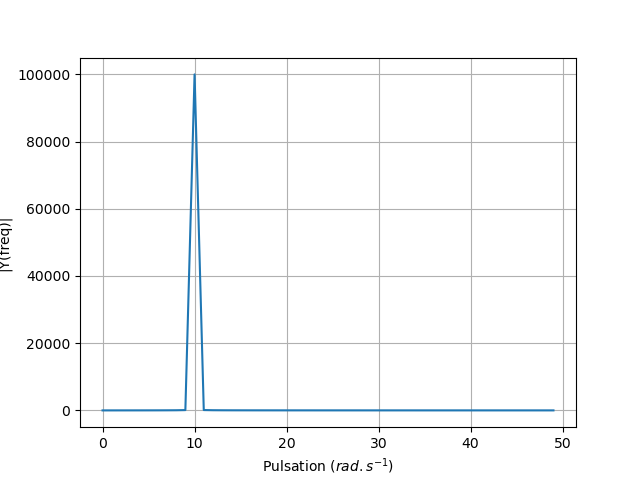

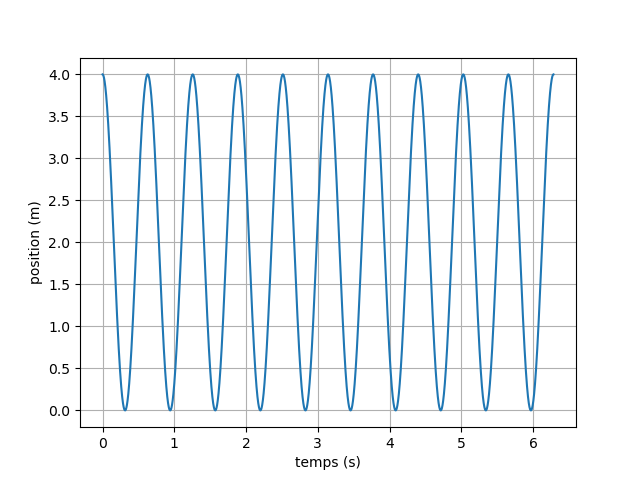

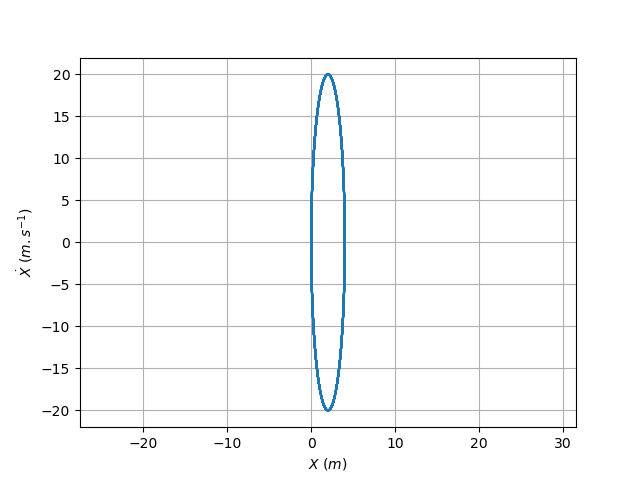

In [3]:
# Tracé du signal en fonction du temps
plt.figure()
plt.plot(t,X)
plt.grid(True)
#    plt.legend((r'Q<<1', r'Q>>1'))
plt.xlabel('temps (s)')
plt.ylabel('position (m)')

# Tracé du portrait de phase
plt.figure()
plt.plot(X,Xpoint)
plt.grid(True)
plt.axis('equal')
#    plt.legend((r'Q<<1', r'Q>>1'))
plt.xlabel(r'$X$' ' ' r'$(m)$')
plt.ylabel(r'$\dot{X}$' ' ' r'$(m.s^{-1})$')


# Tracé de la FFT
nb = 200 # découpe du domaine fréquentiel affiché
Y1 = fft.fft(Xpoint,N) # fft computing and normalization
Y = Y1[:int(N/nb)]

frq1 = np.arange(N)/(Tmax)
frq = frq1[:int(N/nb)] # one side frequency range

plt.figure()
plt.plot(frq*2*np.pi,abs(Y)) # plotting the spectrum
plt.grid(True)
#    plt.legend((r'Sans frottement', r'Avec frottement'))
plt.xlabel('Pulsation ' r'$(rad.s^{-1})$')
plt.ylabel('|Y(freq)|')

plt.show()

On retrouve bien les résultats qualitatifs attendus : 
* oscillations autour de la position d'équilibre $x_\text{éq}$ ;
* oscillations sinusoïdales de pulsation propre $\omega_0=\sqrt{\frac{\alpha^2}{m}}$.
### Colline de potentiel parabolique - Équilibre instable
On suppose dans un premier temps que l'équilibre est instable, et donc que $\frac{\text{d}^2\mathcal{E}_p}{\text{d}x^2}(x_\text{éq})=-\alpha^2<0$ et on résoud cette équation pour le jeu de conditions initiales suivantes : 
$$\left\lbrace\begin{array}{l}
x(t=0)=x_0 \\
\dot{x}(t=0)=v_0
\end{array}\right.$$
L'équation différentielle à résoudre est donc : 
$$m\ddot{x} - (\alpha^2 x-x_\text{éq})=0$$
et il suffit de changer le signe devant $\alpha$ dans `deriv2` pour obtenir la nouvelle solution numérique.

In [4]:
# Données propres au système stable
m = 1.      # masse du système
alpha = 10  # coefficient du puits parabolique
xeq = 2     # position d'équilibre du système
x0 = 4.0    # position initiale du système
v0 = 0.     # vitesse initiale du système

# Paramètres d'intégration temporelle
Tmax = 2*np.pi*np.sqrt(m/alpha**2) # durée de l'intégration réduite par rapport au cas précédent
N = 10000 # Discrétisation / nb de points affichés
t = np.linspace(0.0,Tmax,N) # vecteur temps

xv0 = [x0,v0] # vecteur contenant les conditions initiales

# Fonction vectorielle reprenant l'équation différentielle à résoudre
def deriv2(xv,t):
    return [xv[1], +alpha**2/m*(xv[0]-xeq)]

xv = odeint(deriv2,xv0,t) # résolution de l'équation différentielle à partir des conditions initiales

X = xv[:,0] # extraction des valeurs de position de la solution obtenue
Xpoint = xv[:,1] # extraction des valeurs de vitesse de la solution obtenue
    

Une fois l'équation résolue, on peut tracer les fonctions suivantes : 
* loi horaire ;
* portrait de phase.

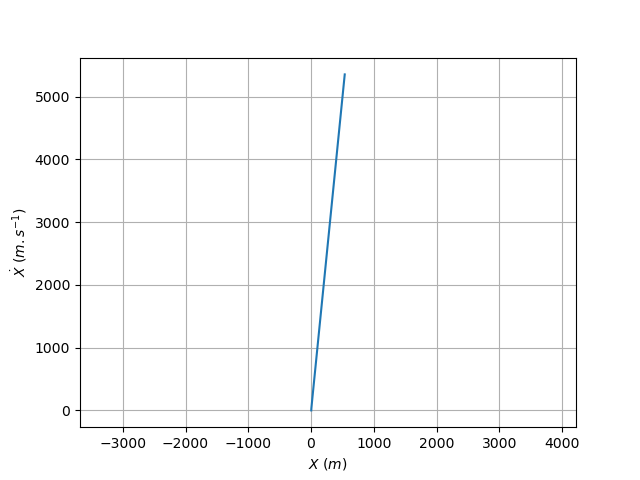

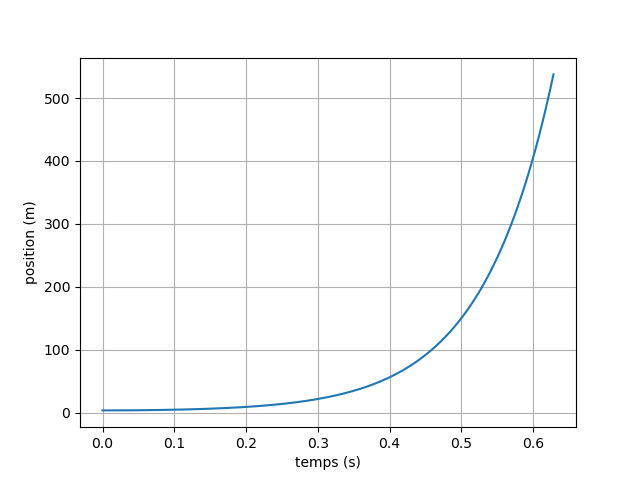

In [5]:
# Tracé du signal en fonction du temps
plt.figure()
plt.plot(t,X)
plt.grid(True)
#    plt.legend((r'Q<<1', r'Q>>1'))
plt.xlabel('temps (s)')
plt.ylabel('position (m)')

# Tracé du portrait de phase
plt.figure()
plt.plot(X,Xpoint)
plt.grid(True)
plt.axis('equal')
#    plt.legend((r'Q<<1', r'Q>>1'))
plt.xlabel(r'$X$' ' ' r'$(m)$')
plt.ylabel(r'$\dot{X}$' ' ' r'$(m.s^{-1})$')


plt.show()

On retrouve une rapide croissante exponentielle qui se traduit par une quasi-droite dans le portrait de phase.

##  Potentiel dissymétrique
On suppose maintenant que le même système ponctuel, placé dans un référentiel galiléen, est cette fois soumis à un ensemble de forces dérivant d'un potentiel fonction légèrement dissymétrique au voisinage de la position d'équilibre $x_\text{éq}$. 

&nbsp;
Un développement de Taylor de ce potentiel au voisinage de cette position d'équilibre permet d'écrire l'énergie potentielle sous la forme :
$$\mathcal{E}_p(x)\simeq \mathcal{E}_p(x_\text{éq})+(x-x_\text{éq})\frac{\text{d}\mathcal{E}_p}{\text{d}x}(x_\text{éq})+\frac{(x-x_\text{éq})^2}{2}\frac{\text{d}^2\mathcal{E}_p}{\text{d}x^2}(x_\text{éq}) + \frac{(x-x_\text{éq})^3}{6}\frac{\text{d}^3\mathcal{E}_p}{\text{d}x^3}(x_\text{éq})$$

&nbsp;
Si la position $x_\text{éq}$ reste une position d'équilibre stable, alors $\frac{\text{d}\mathcal{E}_p}{\text{d}x}(x_\text{éq})=0$, $\frac{\text{d}^2\mathcal{E}_p}{\text{d}x^2}(x_\text{éq})=+\alpha^2>0$ et on notera $\beta=\frac{\text{d}^3\mathcal{E}_p}{\text{d}x^3}(x_\text{éq})$ que l'on supposera positif.<br/>

On commence par tracer le puits de potentiel dissymétrique pour une valeur de $\beta$ fixée arbitrairement et notée `beta`.

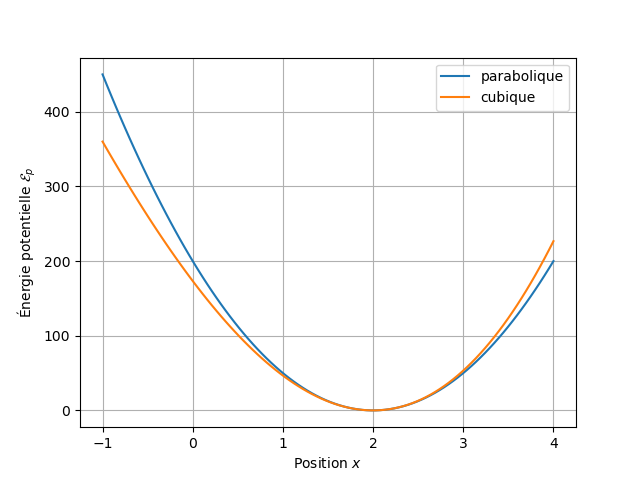

In [6]:
beta = 20.0

xgraph = np.linspace(-1,4,100)
y_parab = alpha**2*(xgraph-xeq)**2/2
y_dis = alpha**2*(xgraph-xeq)**2/2 + beta/6*(xgraph-xeq)**3

plt.figure()
plt.plot(xgraph, y_parab, label='parabolique')
plt.plot(xgraph, y_dis, label='cubique')
plt.xlabel('Position ' r'$x$')
plt.ylabel('Énergie potentielle ' r'$\mathcal{E}_p$')
plt.grid()
plt.legend()
plt.show()

Comme l'énergie mécanique est constante, le théorème de la puissance mécanique permet de déduire l'équation différentielle : 
$$m\ddot{x}+\alpha^2 (x-x_\text{éq}) + \beta \frac{(x-x_\text{éq})^2}{2} = 0$$

Cette équation est non-linéiare à cause du terme $\beta \frac{(x-x_\text{éq})^2}{2}$ et on résoud cette équation pour le jeu de conditions initiales suivantes : 
$$\left\lbrace\begin{array}{l}
x(t=0)=x_0 \\
\dot{x}(t=0)=v_0
\end{array}\right.$$

&nbsp;
La mise en forme vectorielle est la suivante : 
$$\left\lbrace\begin{array}{l}
y=\dot{x} \\
\dot{y}=-\alpha^2 (x-x_\text{éq})-\beta \frac{(x-x_\text{éq})^2}{2}
\end{array}\right.$$

&nbsp;
On modifie alors `deriv2` pour qu'elle évalue la fonction vectorielle $$X\mapsto\left(\begin{array}{l}\dot{x}\\ -\frac{\alpha^2}{m}(x-x_\text{éq}))-\beta \frac{(x-x_\text{éq})^2}{2}\end{array}\right)$$

&nbsp;
On conserve le puits parabolique pour comparaison et mesure des effets de la non-linéarité de cette nouvelle équation que l'on résoudra grâce à la fonction notée `deriv2_parab`.

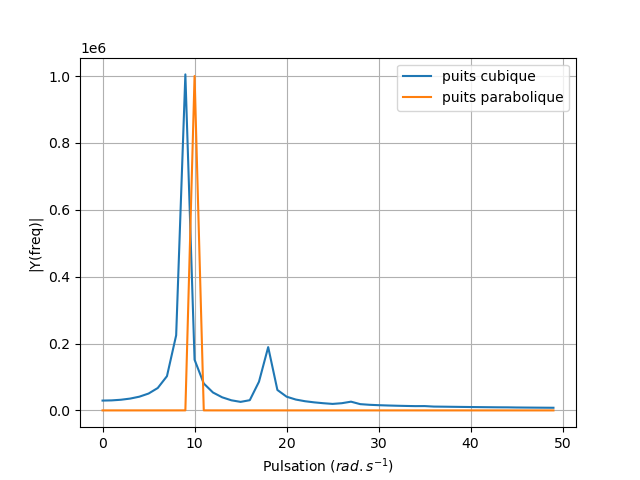

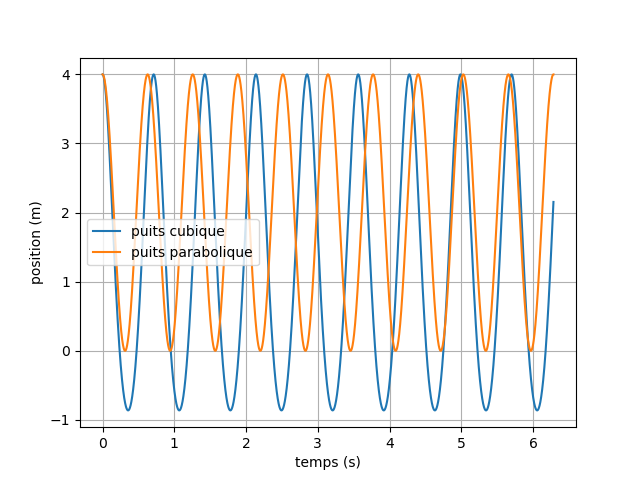

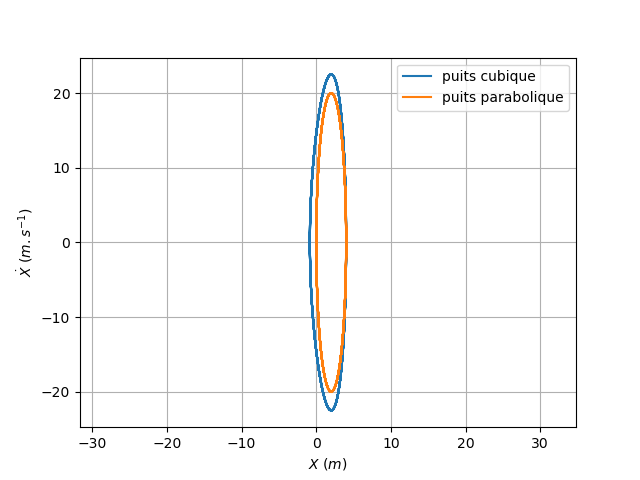

In [7]:
# Données propres au système stable
m = 1.
alpha = 10 # 
xeq = 2 #
x0 = 4.0 #amplitude du forçage
v0 = 0.

# Durée d'inégraton
Tmax = 10*2*np.pi*np.sqrt(m/alpha**2) #
N = 100000 # Nb de points affichés

xv0 = [x0,v0]
t = np.linspace(0.0,Tmax,N)


def deriv2(xv,t):
    return [xv[1], -alpha**2/m*(xv[0]-xeq)-beta/m*(xv[0]-xeq)**2]

def deriv2_parab(xv,t):
    return [xv[1], -alpha**2/m*(xv[0]-xeq)]

xv = odeint(deriv2,xv0,t)
xv2 = odeint(deriv2_parab,xv0,t)

X = xv[:,0]
Xpoint = xv[:,1]

X2 = xv2[:,0]
Xpoint2 = xv2[:,1]
    
# Tracé du signal en fonction du temps
plt.figure()
plt.plot(t,X, label='puits cubique')
plt.plot(t,X2, label='puits parabolique')
plt.grid(True)
plt.xlabel('temps (s)')
plt.ylabel('position (m)')
plt.legend()

# Tracé du portrait de phase
plt.figure()
plt.plot(X,Xpoint, label='puits cubique')
plt.plot(X2,Xpoint2, label='puits parabolique')
plt.grid(True)
plt.axis('equal')
plt.xlabel(r'$X$' ' ' r'$(m)$')
plt.ylabel(r'$\dot{X}$' ' ' r'$(m.s^{-1})$')
plt.legend()

# Tracé de la FFT
nb = 2000 # découpe du domaine fréquentiel affiché
Y1 = fft.fft(Xpoint,N) # fft computing and normalization
Y = Y1[:int(N/nb)]
frq1 = np.arange(N)/(Tmax)
frq = frq1[:int(N/nb)] # one side frequency range

Y1_parab = fft.fft(Xpoint2,N) # fft computing and normalization
Y_parab = Y1_parab[:int(N/nb)]
frq1 = np.arange(N)/(Tmax)
frq = frq1[:int(N/nb)] # one side frequency range

plt.figure()
plt.plot(frq*2*np.pi,abs(Y), label='puits cubique') # plotting the spectrum
plt.plot(frq*2*np.pi,abs(Y_parab), label='puits parabolique') # plotting the spectrum
plt.grid(True)
plt.xlabel('Pulsation ' r'$(rad.s^{-1})$')
plt.ylabel('|Y(freq)|')
plt.legend()

plt.show()

Les effets des non-linéarités se traduisent par :
* un décalage fréquentiel du mode principal ;
* une apparition de nouvelles fréquences.